In [43]:
import pandas as pd
from data.dataset import MyDataset as Dataset

dataset = Dataset('ml-1m')

CUDA available! Setting default tensor type to cuda.FloatTensor
The links parameter aren't initialized!


In [44]:
df = dataset.innerRatingsDF
unique_users = len(df['user'].unique())
unique_items = len(df['item'].unique())

print(f"There are {unique_users} unique users in the dataset")
print(f"There are {unique_items} unique items in the dataset")

There are 6040 unique users in the dataset
There are 3706 unique items in the dataset


In [45]:
average_ratings = df['user'].value_counts().mean()
print(f"Users rate an average of {average_ratings} items in the dataset")

Users rate an average of 165.5973509933775 items in the dataset


In [4]:
df = df.groupby('item').filter(lambda x: len(x) >= 5)
df = df.groupby('user').filter(lambda x: len(x) >= 20)
print(df['item'].value_counts().min())
print(df['user'].value_counts().min())
average_ratings = df['user'].value_counts().mean()
print(f"Users rate an average of {average_ratings} items in the dataset")

4
20
Users rate an average of 165.619884009942 items in the dataset


In [5]:
print(len(df['item'].unique()))
print(len(df['user'].unique()))

3416
6035


In [6]:
import matplotlib.pyplot as plt
print(df['item'].value_counts())
#plt.hist(df['item'].value_counts())
#plt.show()

103     3426
43      2991
124     2990
63      2883
112     2672
        ... 
3409       5
3404       5
3257       5
3612       5
3558       4
Name: item, Length: 3416, dtype: int64


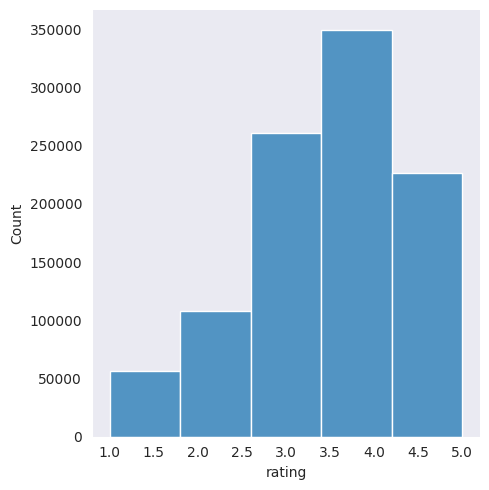

In [46]:
import seaborn as sns

sns.set_style('dark')
sns.displot(df['rating'], bins=5)

The most commonly rated movie is 3428


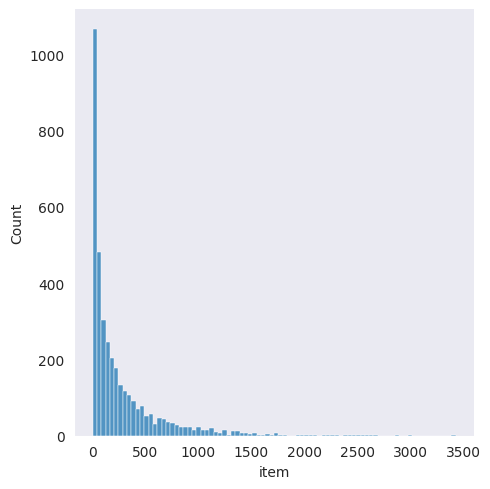

In [50]:
item_counts = df['item'].value_counts()
sns.displot(item_counts)
most_common = item_counts.index[0]
value = item_counts.max()
print(f"The most commonly rated movie is {most_common} with {value} ratings")

/tmp/ipykernel_304492/1216109616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['user'].value_counts())


<AxesSubplot:xlabel='user', ylabel='Density'>

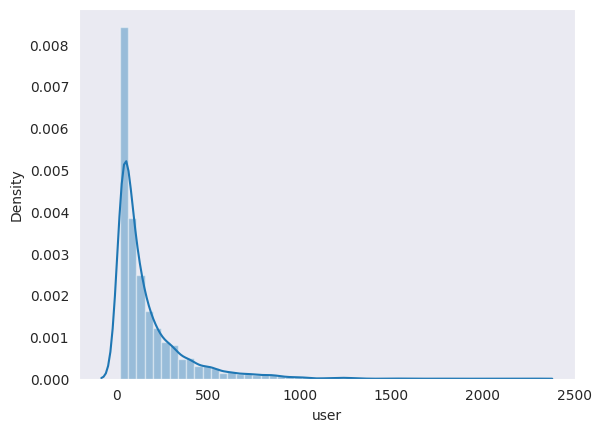

In [42]:
sns.distplot(df['user'].value_counts())